In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_ds = pd.read_csv('data/mitbih_train.csv')
traindf = pd.DataFrame(train_ds)
test_ds = pd.read_csv('data/mitbih_test.csv')
testdf = pd.DataFrame(test_ds)

traindf.columns = range(traindf.shape[1])
testdf.columns = range(testdf.shape[1])
print(traindf)

            0         1         2         3         4         5         6    \
0      0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
1      1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
2      0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
3      0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   
4      0.927461  1.000000  0.626943  0.193437  0.094991  0.072539  0.043178   
...         ...       ...       ...       ...       ...       ...       ...   
87548  0.807018  0.494737  0.536842  0.529825  0.491228  0.484211  0.456140   
87549  0.718333  0.605000  0.486667  0.361667  0.231667  0.120000  0.051667   
87550  0.906122  0.624490  0.595918  0.575510  0.530612  0.481633  0.444898   
87551  0.858228  0.645570  0.845570  0.248101  0.167089  0.131646  0.121519   
87552  0.901506  0.845886  0.800695  0.748552  0.687138  0.599073  0.512167   

            7         8         9    ...  178  179 

0.000000000000000000e+00.88
0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_12512\384697131.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_clases.index, y=conteo_clases.values, palette="viridis")


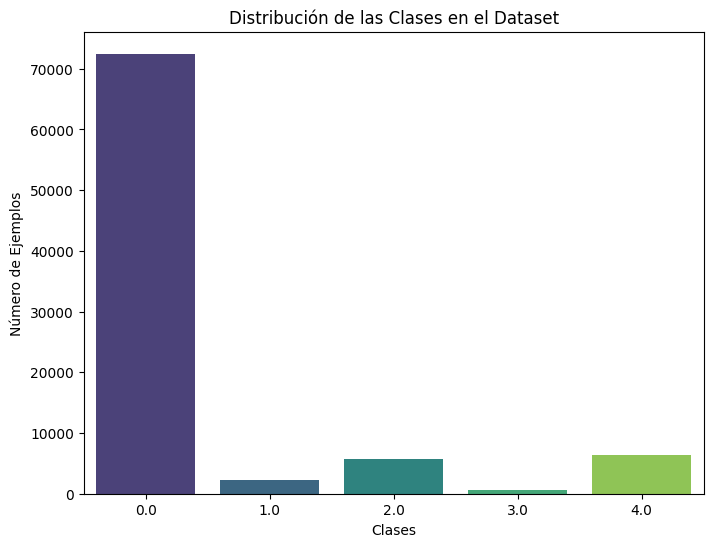

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que la última columna es la que contiene las clases
clase_columna = '0.000000000000000000e+00.88'  # Cambia este nombre si es diferente

# Contar el número de ejemplos por clase
conteo_clases = traindf[clase_columna].value_counts()

print(conteo_clases)

# Visualizar la distribución de las clases
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_clases.index, y=conteo_clases.values, palette="viridis")
plt.title('Distribución de las Clases en el Dataset')
plt.xlabel('Clases')
plt.ylabel('Número de Ejemplos')
plt.show()


In [10]:
# Calcular la proporción entre la clase mayoritaria y la minoritaria
max_clase = conteo_clases.max()
min_clase = conteo_clases.min()

proporcion = max_clase / min_clase
print(f'Proporción entre la clase mayoritaria y minoritaria: {proporcion:.2f}')

# Generalmente, una proporción mayor a 1.5 o 2.0 sugiere un desbalance.
if proporcion > 1.5:
    print("El dataset está desbalanceado y podría requerir técnicas de balanceo.")
else:
    print("El dataset parece estar balanceado.")


Proporción entre la clase mayoritaria y minoritaria: 113.06
El dataset está desbalanceado y podría requerir técnicas de balanceo.


Prueba sin balanceo de 5 modelos
-
-
-
-
-

----- Random Forest -----
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     72470
         1.0       0.98      0.63      0.77      2223
         2.0       0.98      0.89      0.93      5788
         3.0       0.92      0.59      0.72       641
         4.0       0.99      0.95      0.97      6431

    accuracy                           0.97     87553
   macro avg       0.97      0.81      0.87     87553
weighted avg       0.97      0.97      0.97     87553



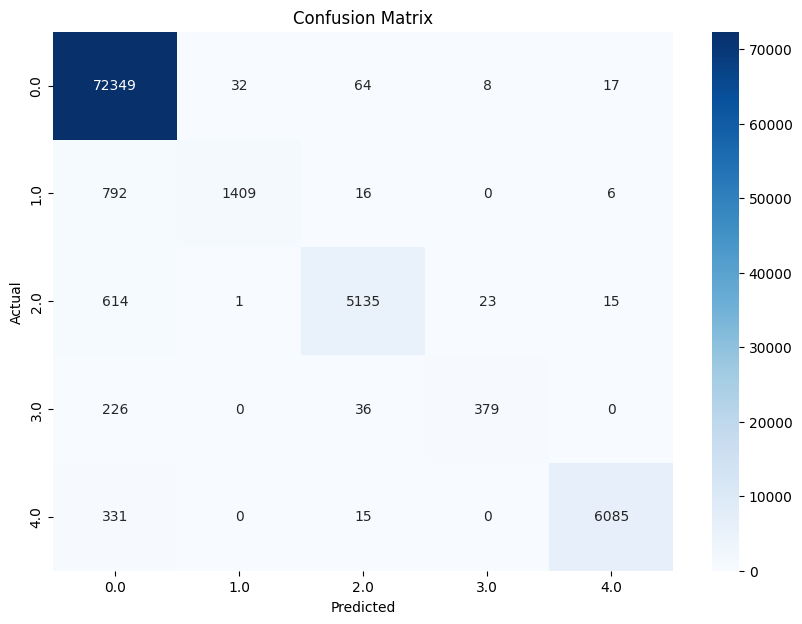

----- Balanced Random Forest -----


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `Fals

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.92     72470
         1.0       0.36      0.83      0.51      2223
         2.0       0.72      0.90      0.80      5788
         3.0       0.12      0.90      0.22       641
         4.0       0.88      0.96      0.92      6431

    accuracy                           0.87     87553
   macro avg       0.62      0.89      0.67     87553
weighted avg       0.94      0.87      0.90     87553



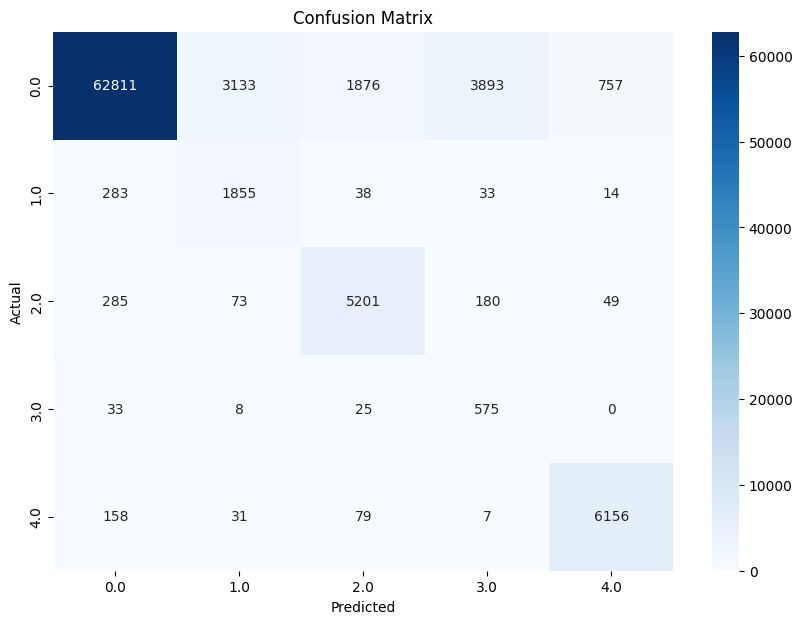

----- RandomForest Weight Balance -----
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     72470
         1.0       0.97      0.62      0.75      2223
         2.0       0.98      0.87      0.92      5788
         3.0       0.92      0.60      0.73       641
         4.0       1.00      0.95      0.97      6431

    accuracy                           0.97     87553
   macro avg       0.97      0.81      0.87     87553
weighted avg       0.97      0.97      0.97     87553



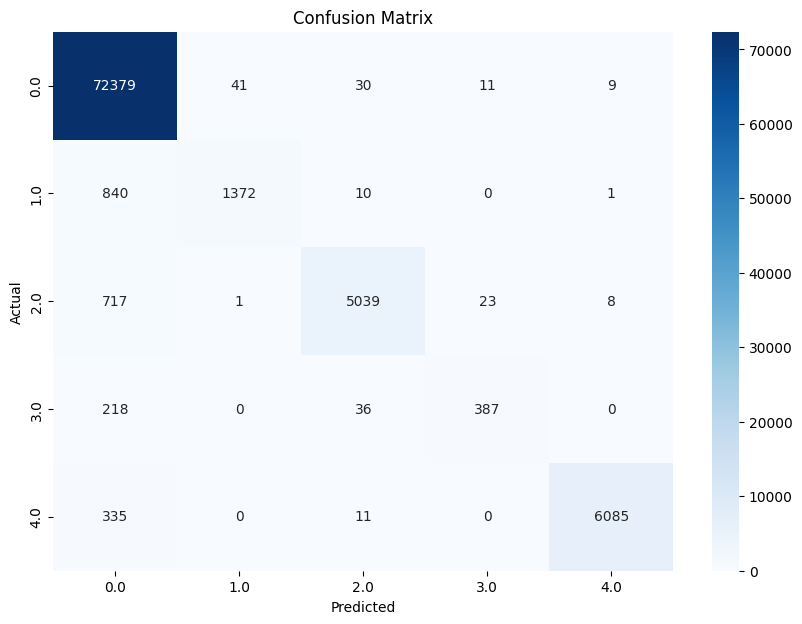

----- MLP -----


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     72470
         1.0       0.86      0.73      0.79      2223
         2.0       0.93      0.92      0.93      5788
         3.0       0.83      0.66      0.73       641
         4.0       0.98      0.98      0.98      6431

    accuracy                           0.98     87553
   macro avg       0.92      0.85      0.88     87553
weighted avg       0.98      0.98      0.98     87553



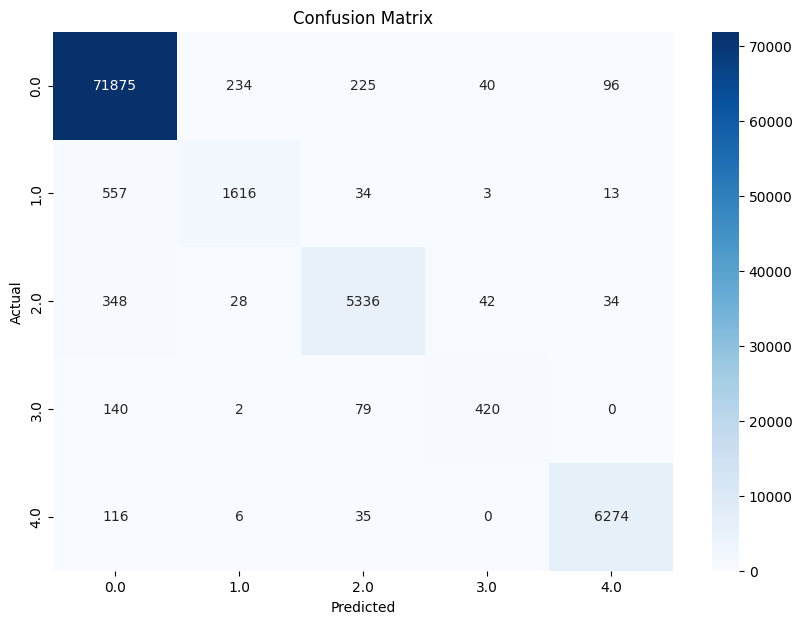

----- KNeighbors -----
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     72470
         1.0       0.92      0.66      0.77      2223
         2.0       0.93      0.89      0.91      5788
         3.0       0.83      0.66      0.73       641
         4.0       0.99      0.95      0.97      6431

    accuracy                           0.97     87553
   macro avg       0.93      0.83      0.87     87553
weighted avg       0.97      0.97      0.97     87553



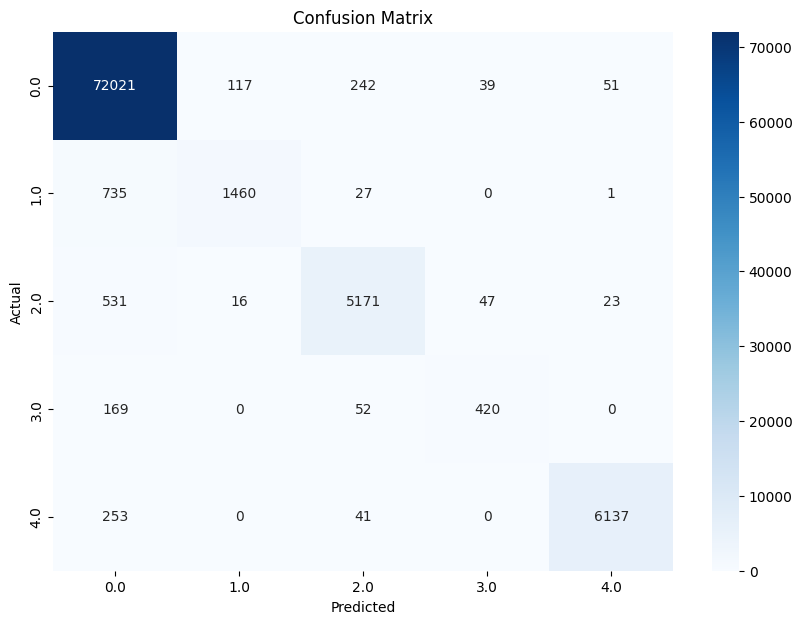

In [5]:
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Cargar los datos
X = traindf.iloc[:, :-1]  # Todas las columnas excepto la última (características)
y = traindf.iloc[:, -1]   # La última columna (clase)

X_t = testdf.iloc[:, :-1]  # Todas las columnas excepto la última (características) (conjunto de prueba)
y_t = testdf.iloc[:, -1]   # La última columna (clase) (conjunto de prueba)

# Definir los modelos
models4 = {
    'Random Forest': RandomForestClassifier(),
    'Balanced Random Forest': BalancedRandomForestClassifier(),
    'RandomForest Weight Balance': RandomForestClassifier(class_weight='balanced'),
    'MLP' : MLPClassifier(),
    'Kneighbors' : KNeighborsClassifier()
}

# Evaluar los modelos con validación cruzada y SMOTE + Submuestreo
kf = StratifiedKFold(n_splits=5, shuffle=True)

for model_name, model in models4.items():
    print(f'----- {model_name} -----')

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(X, y):
        # Separar datos de entrenamiento y prueba
        x_train = X.iloc[train_index, :]
        y_train = y.iloc[train_index]
        x_test = X.iloc[test_index, :]
        y_test = y.iloc[test_index]

        # Entrenar el modelo
        model.fit(x_train, y_train)

        # Predecir sobre el conjunto de prueba
        y_pred = model.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    # Imprimir informe de clasificación
    print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

    cm = confusion_matrix(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))

    # Visualizar la matriz de confusión
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(np.concatenate(cv_y_test)), yticklabels=np.unique(np.concatenate(cv_y_test)))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


Prueba de 3 modelos sin datos balanceados con los datos de prueba.
-
-
-
-

----- Random Forest -----
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     18117
         1.0       0.98      0.60      0.74       556
         2.0       0.98      0.88      0.93      1448
         3.0       0.89      0.59      0.71       162
         4.0       0.99      0.94      0.97      1608

    accuracy                           0.97     21891
   macro avg       0.96      0.80      0.87     21891
weighted avg       0.97      0.97      0.97     21891



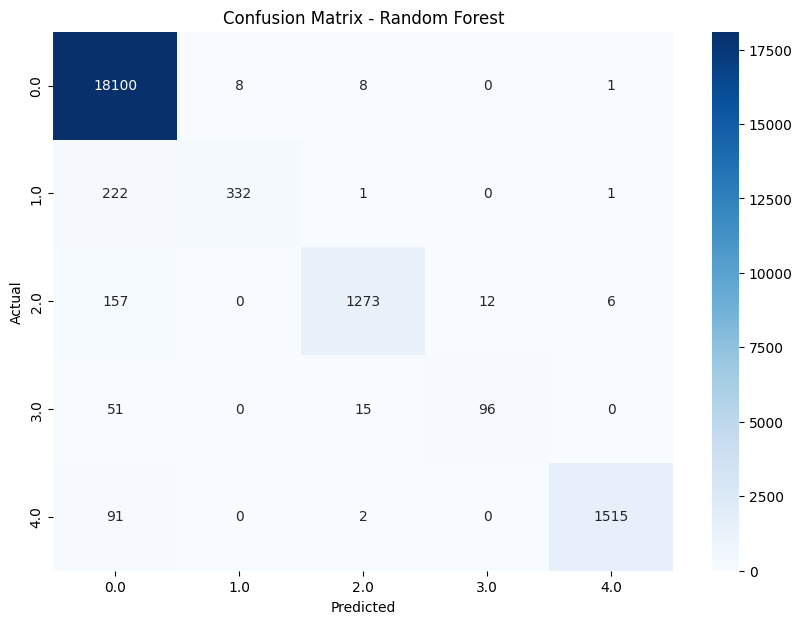

----- Balanced Random Forest -----


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `Fals

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     18117
         1.0       0.33      0.80      0.47       556
         2.0       0.71      0.89      0.79      1448
         3.0       0.13      0.90      0.22       162
         4.0       0.89      0.95      0.92      1608

    accuracy                           0.87     21891
   macro avg       0.61      0.88      0.66     21891
weighted avg       0.94      0.87      0.90     21891



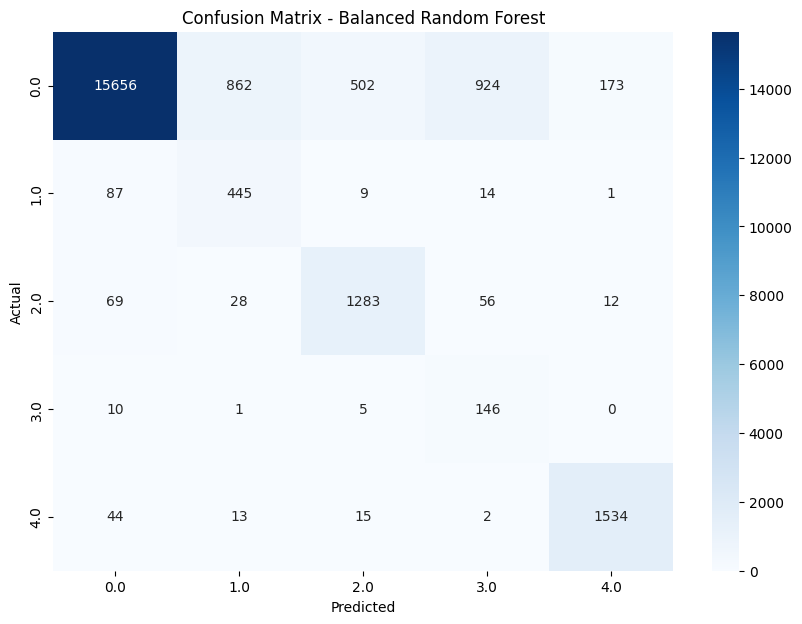

----- RandomForest Weight Balance -----
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18117
         1.0       0.97      0.58      0.73       556
         2.0       0.98      0.86      0.92      1448
         3.0       0.83      0.59      0.69       162
         4.0       1.00      0.94      0.97      1608

    accuracy                           0.97     21891
   macro avg       0.95      0.79      0.86     21891
weighted avg       0.97      0.97      0.97     21891



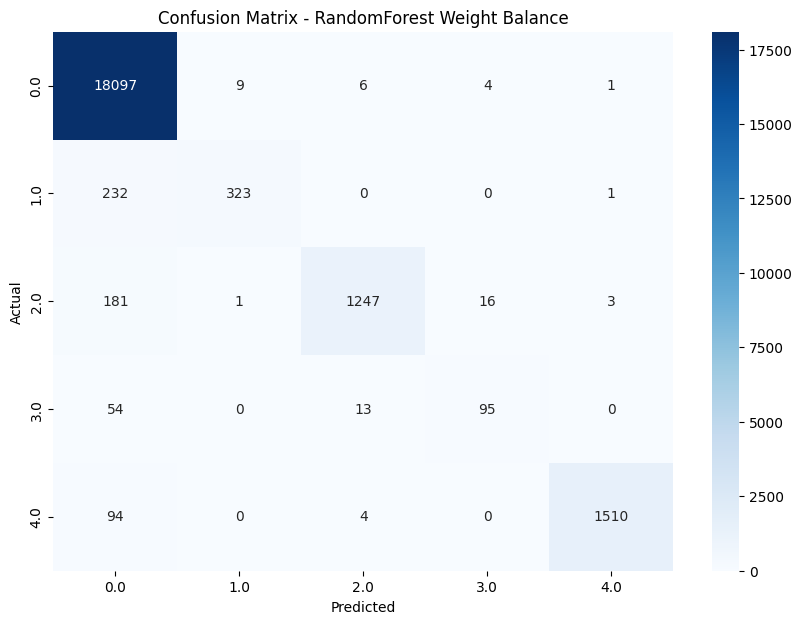

In [7]:
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar los datos de entrenamiento y prueba
X = traindf.iloc[:, :-1]  # Todas las columnas excepto la última (características)
y = traindf.iloc[:, -1]   # La última columna (clase)

X_t = testdf.iloc[:, :-1]  # Conjunto de características de prueba
y_t = testdf.iloc[:, -1]   # Conjunto de etiquetas de prueba

# Definir los modelos
models5 = {
    'Random Forest': RandomForestClassifier(),
    'Balanced Random Forest': BalancedRandomForestClassifier(),
    'RandomForest Weight Balance': RandomForestClassifier(class_weight='balanced')
}

# Evaluar los modelos
kf = StratifiedKFold(n_splits=5, shuffle=True)

for model_name, model in models5.items():
    print(f'----- {model_name} -----')

    cv_y_test = []
    cv_y_pred = []

    # Validación cruzada en el conjunto de entrenamiento
    for train_index, test_index in kf.split(X, y):
        # Separar datos de entrenamiento y prueba
        x_train = X.iloc[train_index, :]
        y_train = y.iloc[train_index]
        x_test = X.iloc[test_index, :]
        y_test = y.iloc[test_index]

        # Entrenar el modelo
        model.fit(x_train, y_train)

    # Una vez entrenado el modelo, predecir en el conjunto de prueba
    y_pred_test = model.predict(X_t)

    # Imprimir el informe de clasificación con los datos de prueba
    print(classification_report(y_t, y_pred_test))

    # Generar y visualizar la matriz de confusión con los datos de prueba
    cm = confusion_matrix(y_t, y_pred_test)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_t), yticklabels=np.unique(y_t))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


Prueba hiperparámetros de BalancedRandomForest con los datos originales
-
-
-

Balanced Random Forest Grid Search


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `Fals

Mejores parámetros BRF: {'model__max_depth': 30, 'model__min_samples_split': 2, 'model__n_estimators': 500}
Resultados Balanced Random Forest:
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93     18117
         1.0       0.38      0.81      0.51       556
         2.0       0.77      0.89      0.83      1448
         3.0       0.13      0.91      0.23       162
         4.0       0.90      0.96      0.93      1608

    accuracy                           0.89     21891
   macro avg       0.63      0.89      0.69     21891
weighted avg       0.94      0.89      0.91     21891



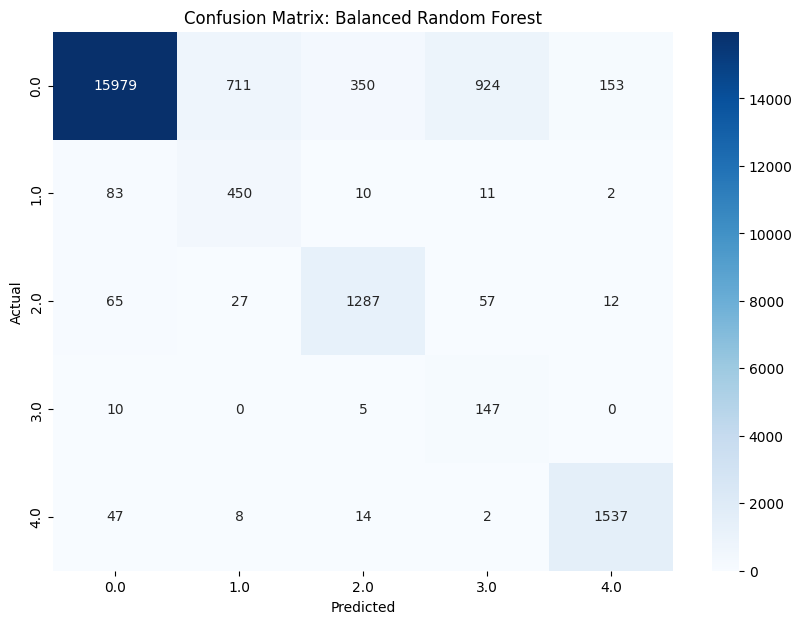

In [4]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los parámetros a probar en BalancedRandomForest
param_grid_brf1 = {
    'model__n_estimators': [100, 200, 500],  # Número de árboles
    'model__max_depth': [10, 20, 30, None],      # Profundidad máxima de los árboles
    'model__min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
}

# Cargar los datos
X = traindf.iloc[:, :-1]  # Todas las columnas excepto la última (características)
y = traindf.iloc[:, -1]    # La última columna (clase)

X_t = testdf.iloc[:, :-1]  # Todas las columnas excepto la última (características) (conjunto de prueba)
y_t = testdf.iloc[:, -1]   # La última columna (clase) (conjunto de prueba)

# Definir la validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline para BalancedRandomForest sin SMOTE (ya es balanceado internamente)
pipeline_brf1 = Pipeline([
    ('model', BalancedRandomForestClassifier(random_state=42))
])


grid_search_brf1 = GridSearchCV(pipeline_brf1, param_grid_brf1, cv=kf, scoring='f1_weighted', n_jobs=-1)

print("Balanced Random Forest Grid Search")
grid_search_brf1.fit(X, y)
print(f"Mejores parámetros BRF: {grid_search_brf1.best_params_}")

y_pred_brf1 = grid_search_brf1.best_estimator_.predict(X_t)

print("Resultados Balanced Random Forest:")
print(classification_report(y_t, y_pred_brf1))

# ---- Matriz de confusión para BalancedRandomForestClassifier ----
cm_brf = confusion_matrix(y_t, y_pred_brf1)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_brf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_t), yticklabels=np.unique(y_t))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Balanced Random Forest')
plt.show()

Prueba de hiperparámetros con BalancedRandomForest utilizando classweigh balance
-
-
-

Balanced Random Forest Grid Search


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `Fals

Mejores parámetros BRF: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 500}
Resultados Balanced Random Forest:
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94     18117
         1.0       0.38      0.78      0.51       556
         2.0       0.78      0.90      0.83      1448
         3.0       0.15      0.91      0.26       162
         4.0       0.92      0.95      0.94      1608

    accuracy                           0.90     21891
   macro avg       0.64      0.89      0.70     21891
weighted avg       0.95      0.90      0.92     21891



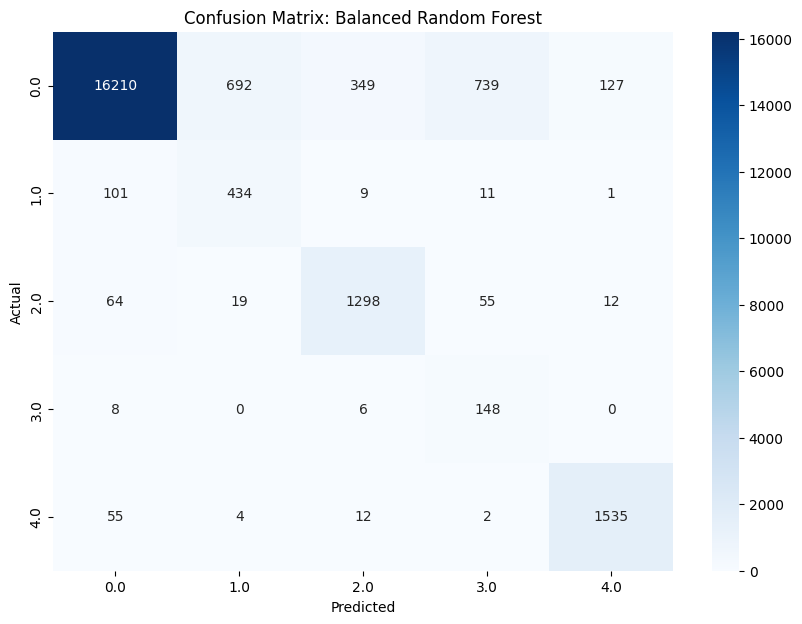

In [6]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los parámetros a probar en BalancedRandomForest
param_grid_brf2 = {
    'model__n_estimators': [100, 200, 500],  # Número de árboles
    'model__max_depth': [10, 20, 30, None],      # Profundidad máxima de los árboles
    'model__min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
}

# Cargar los datos
X = traindf.iloc[:, :-1]  # Todas las columnas excepto la última (características)
y = traindf.iloc[:, -1]    # La última columna (clase)

X_t = testdf.iloc[:, :-1]  # Todas las columnas excepto la última (características) (conjunto de prueba)
y_t = testdf.iloc[:, -1]   # La última columna (clase) (conjunto de prueba)

# Definir la validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline para BalancedRandomForest sin SMOTE (ya es balanceado internamente)
pipeline_brf2 = Pipeline([
    ('model', BalancedRandomForestClassifier(random_state=42, class_weight= 'balanced'))
])


grid_search_brf2 = GridSearchCV(pipeline_brf2, param_grid_brf2, cv=kf, scoring='f1_weighted', n_jobs=-1)

print("Balanced Random Forest Grid Search")
grid_search_brf2.fit(X, y)
print(f"Mejores parámetros BRF: {grid_search_brf2.best_params_}")

y_pred_brf2 = grid_search_brf2.best_estimator_.predict(X_t)

print("Resultados Balanced Random Forest:")
print(classification_report(y_t, y_pred_brf2))

# ---- Matriz de confusión para BalancedRandomForestClassifier ----
cm_brf = confusion_matrix(y_t, y_pred_brf2)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_brf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_t), yticklabels=np.unique(y_t))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Balanced Random Forest')
plt.show()

Prueba de RandomForest solo con submuestreo
-
-
-

In [25]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Cargar los datos
X = traindf.iloc[:, :-1]  # Todas las columnas excepto la última (características)
y = traindf.iloc[:, -1]   # La última columna (clase)

# Definir el modelo
model3 = RandomForestClassifier()

# Crear el submuestreador
undersampler = RandomUnderSampler(random_state=42)

# Evaluar el modelo con validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X, y):
    # Separar datos de entrenamiento y prueba
    x_train = X.iloc[train_index, :]
    y_train = y.iloc[train_index]
    x_test = X.iloc[test_index, :]
    y_test = y.iloc[test_index]

    # Aplicar submuestreo solo en los datos de entrenamiento
    x_train_resampled, y_train_resampled = undersampler.fit_resample(x_train, y_train)

    # Ver la distribución de clases después del submuestreo
    unique, counts = np.unique(y_train_resampled, return_counts=True)
    print(f"Distribución de clases tras submuestreo en el pliegue:\n{dict(zip(unique, counts))}\n")

    # Entrenar el modelo con los datos submuestreados
    model.fit(x_train_resampled, y_train_resampled)

    # Predecir sobre el conjunto de prueba
    y_pred = model.predict(x_test)

    # Almacenar las predicciones y los valores verdaderos
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

# Imprimir informe de clasificación
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


Distribución de clases tras submuestreo en el pliegue:
{np.float64(0.0): np.int64(513), np.float64(1.0): np.int64(513), np.float64(2.0): np.int64(513), np.float64(3.0): np.int64(513), np.float64(4.0): np.int64(513)}

Distribución de clases tras submuestreo en el pliegue:
{np.float64(0.0): np.int64(512), np.float64(1.0): np.int64(512), np.float64(2.0): np.int64(512), np.float64(3.0): np.int64(512), np.float64(4.0): np.int64(512)}

Distribución de clases tras submuestreo en el pliegue:
{np.float64(0.0): np.int64(513), np.float64(1.0): np.int64(513), np.float64(2.0): np.int64(513), np.float64(3.0): np.int64(513), np.float64(4.0): np.int64(513)}

Distribución de clases tras submuestreo en el pliegue:
{np.float64(0.0): np.int64(513), np.float64(1.0): np.int64(513), np.float64(2.0): np.int64(513), np.float64(3.0): np.int64(513), np.float64(4.0): np.int64(513)}

Distribución de clases tras submuestreo en el pliegue:
{np.float64(0.0): np.int64(513), np.float64(1.0): np.int64(513), np.float64(2

Prueba de Kneighbors solo con submuestreo
-
-
-

In [26]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Cargar los datos
X = traindf.iloc[:, :-1]  # Todas las columnas excepto la última (características)
y = traindf.iloc[:, -1]   # La última columna (clase)

# Definir el modelo
model4 = KNeighborsClassifier()

# Crear el submuestreador
undersampler = RandomUnderSampler(random_state=42)

# Evaluar el modelo con validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X, y):
    # Separar datos de entrenamiento y prueba
    x_train = X.iloc[train_index, :]
    y_train = y.iloc[train_index]
    x_test = X.iloc[test_index, :]
    y_test = y.iloc[test_index]

    # Aplicar submuestreo solo en los datos de entrenamiento
    x_train_resampled, y_train_resampled = undersampler.fit_resample(x_train, y_train)

    # Ver la distribución de clases después del submuestreo
    unique, counts = np.unique(y_train_resampled, return_counts=True)
    print(f"Distribución de clases tras submuestreo en el pliegue:\n{dict(zip(unique, counts))}\n")

    # Entrenar el modelo con los datos submuestreados
    model.fit(x_train_resampled, y_train_resampled)

    # Predecir sobre el conjunto de prueba
    y_pred = model.predict(x_test)

    # Almacenar las predicciones y los valores verdaderos
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

# Imprimir informe de clasificación
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


Distribución de clases tras submuestreo en el pliegue:
{np.float64(0.0): np.int64(513), np.float64(1.0): np.int64(513), np.float64(2.0): np.int64(513), np.float64(3.0): np.int64(513), np.float64(4.0): np.int64(513)}

Distribución de clases tras submuestreo en el pliegue:
{np.float64(0.0): np.int64(512), np.float64(1.0): np.int64(512), np.float64(2.0): np.int64(512), np.float64(3.0): np.int64(512), np.float64(4.0): np.int64(512)}

Distribución de clases tras submuestreo en el pliegue:
{np.float64(0.0): np.int64(513), np.float64(1.0): np.int64(513), np.float64(2.0): np.int64(513), np.float64(3.0): np.int64(513), np.float64(4.0): np.int64(513)}

Distribución de clases tras submuestreo en el pliegue:
{np.float64(0.0): np.int64(513), np.float64(1.0): np.int64(513), np.float64(2.0): np.int64(513), np.float64(3.0): np.int64(513), np.float64(4.0): np.int64(513)}

Distribución de clases tras submuestreo en el pliegue:
{np.float64(0.0): np.int64(513), np.float64(1.0): np.int64(513), np.float64(2